In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
lats = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
lngs = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
lat_lngs = zip(lats, lngs)

In [4]:
coordinates = list(lat_lngs)

In [5]:
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [6]:
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

cockburn town tc
gat ly
parvatsar in
punta arenas cl
saint george bm


In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

5

In [8]:
import requests
from config import weather_api_key

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7bb035e8bc8f4f9c14049a9dabc01778


In [10]:
city_url = url + "&q=" + "Boston"

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7bb035e8bc8f4f9c14049a9dabc01778&q=Boston


In [11]:
weather_response = requests.get(city_url)
weather_json = weather_response.json()

In [12]:
weather_json.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [13]:
weather_json.get("main")

{'temp': 35.24,
 'feels_like': 23.76,
 'temp_min': 32.65,
 'temp_max': 37.35,
 'pressure': 1015,
 'humidity': 27}

In [14]:
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


In [15]:
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7bb035e8bc8f4f9c14049a9dabc01778&q=Bston


In [16]:
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 35.24,
  'feels_like': 23.76,
  'temp_min': 32.65,
  'temp_max': 37.35,
  'pressure': 1015,
  'humidity': 27},
 'visibility': 10000,
 'wind': {'speed': 21.85, 'deg': 290, 'gust': 32.21},
 'clouds': {'all': 40},
 'dt': 1668976021,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1668944478,
  'sunset': 1668979126},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [17]:
boston_data = city_weather.json()

In [18]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 37.35 27 40 21.85


In [19]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-11-20 20:27:01'

In [20]:
city_data = []

In [21]:
import time
from datetime import datetime

In [22]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [23]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [26]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 6 of Set 1 | cockburn town
Processing Record 7 of Set 1 | gat
Processing Record 8 of Set 1 | parvatsar
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | saint george
-----------------------------
Data Retrieval Complete      
-----------------------------


In [27]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cockburn Town,21.4612,-71.1419,84.16,65,40,16.11,TC,2022-11-20 20:27:12
1,Gat,31.6100,34.7642,70.79,37,33,16.49,IL,2022-11-20 20:29:35
2,Parvatsar,26.8833,74.7667,62.37,30,0,5.79,IN,2022-11-20 20:29:35
3,Punta Arenas,-53.1500,-70.9167,53.71,54,75,24.16,CL,2022-11-20 20:26:35
4,Saint George,37.1041,-113.5841,52.43,28,0,4.00,US,2022-11-20 20:29:36
5,Cockburn Town,21.4612,-71.1419,84.16,65,40,16.11,TC,2022-11-20 20:27:12
6,Gat,31.6100,34.7642,70.79,37,33,16.49,IL,2022-11-20 20:29:35
7,Parvatsar,26.8833,74.7667,62.37,30,0,5.79,IN,2022-11-20 20:29:35
8,Punta Arenas,-53.1500,-70.9167,53.71,54,75,24.16,CL,2022-11-20 20:26:35
9,Saint George,37.1041,-113.5841,52.43,28,0,4.00,US,2022-11-20 20:29:36


In [29]:
# Create the output file (CSV).
output_data_file = "Resources/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [31]:
import time
# Get today's date in seconds.
today = time.time()
today

1668983676.78428

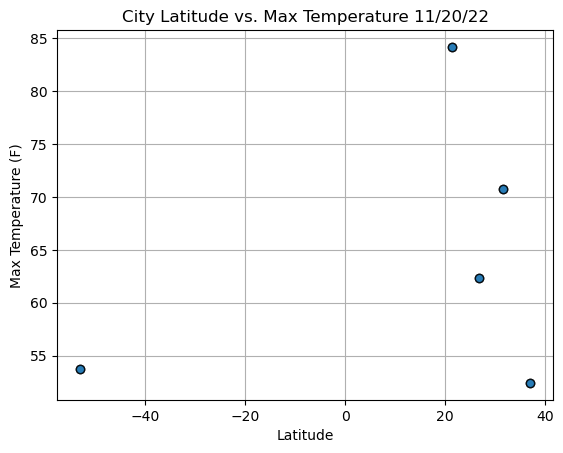

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Resources/Fig1.png")

# Show plot.
plt.show()